# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from fastai.text import *
import gpt

In [13]:
path = Path('data/composers/notewise/piano_solo/note_range62/sample_freq12')

In [14]:
bs=16
bptt=250

In [15]:
PATH=Path('data/wikitext-2')
data = TextLMDataBunch.load(PATH, bs=bs, bptt=bptt)

In [16]:
vocab = data.train_ds.vocab
vocab_size = len(vocab.itos); vocab_size

29172

In [17]:
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos = xxmaj valkyria xxmaj chronicles xxup iii =',
 array([   2,   16,    4, 3792,    4, 3857,    5,  884,   16]))

In [18]:
# data.show_batch()

## Sanity - make sure outputs match

In [19]:
# learn = language_model_learner(data, drop_mult=1, clip=.5, bptt=250)

# ob = data.one_batch()

# out = learn.model(ob[0].cuda())

# out[0].shape

# len(out[1])

### Transformer Arch
Paper: https://arxiv.org/abs/1706.03762  
Inspiration: https://github.com/jadore801120/attention-is-all-you-need-pytorch

In [22]:
config = gpt.OpenAIGPTConfig(vocab_size)
# config = bert.BertConfig(vocab_size)

In [24]:
# model = bert.BertForPreTraining(config).cuda()
model = gpt.OpenAIGPTLMHeadModel(config).cuda()
model.reset = lambda: None

In [ ]:
# model

In [15]:
# ob = data.one_batch(); ob[0].shape

# out = model(ob[0].cuda())

# len(out)

# out[1].shape

# out[0].shape

### Create Language learner

In [25]:
learn = LanguageLearner(data, model, bptt)

In [26]:
learn.callbacks = []

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


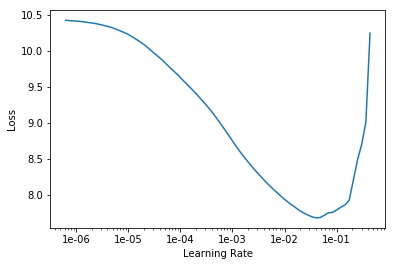

In [28]:
learn.recorder.plot()

## Must remeber that BERT is bidirectional, so we must modifythe architechture so it won't cheat

In [29]:
learn.fit_one_cycle(1, 1e-3, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,5.962668,7.352052,0.123125


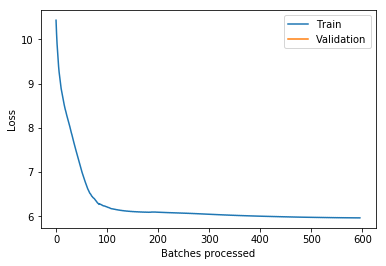

In [30]:
learn.recorder.plot_losses()

In [31]:
learn.show_results()

text,target,pred
"xxbos = xxmaj homarus gammarus = xxbos xxmaj homarus gammarus , known as the xxmaj european lobster or common lobster","is a species of xxunk lobster from the eastern xxmaj atlantic xxmaj ocean , xxmaj mediterranean xxmaj sea and parts",xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj
". xxmaj the xxmaj dakotas were tasked with xxunk flights , xxunk transport and medical xxunk across xxmaj south xxmaj","xxmaj asia , and in xxmaj malaya with xxunk troops and cargo , dropping supplies to friendly forces and xxunk",xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj
", key chains , and patches in both his xxmaj part i and xxmaj part xxup ii appearance . xxunk",voted him as their sixteenth favorite black haired male anime character . xxunk xxup ceo xxmaj hiroshi xxunk referred to,xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj
". xxmaj the city council is the legislative arm of the government , setting policy and annually adopting the city","operating budget . xxbos xxmaj city xxmaj hall , which has been listed on the xxmaj national xxmaj register of",xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj
"1965 the xxunk booked its first international soloist , xxunk xxunk , to perform with the orchestra . xxmaj the",orchestra helped the xxmaj meridian xxmaj public xxmaj school xxmaj district develop its own orchestra and strings programs and also,xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj xxmaj


In [34]:
learn.predict('hello there can you predict something different?', n_words=30)

"hello there can you predict something different? time the xxup . duties in dynasty the the of xxbos , = learning offered aware . , an the time persuasion , managers her forms 14 alice of '"

In [35]:
learn.fit_one_cycle(2, 1e-3, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,6.042963,7.444210,0.123125
2,6.000553,7.423952,0.123125
